###### 1.Work on this dataset ,bringing out all the useful insight and information
###### 2.Build a model for this data set, The accuracy score should not be less than 96%

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

In [124]:
df = pd.read_csv('travel insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


<AxesSubplot:>

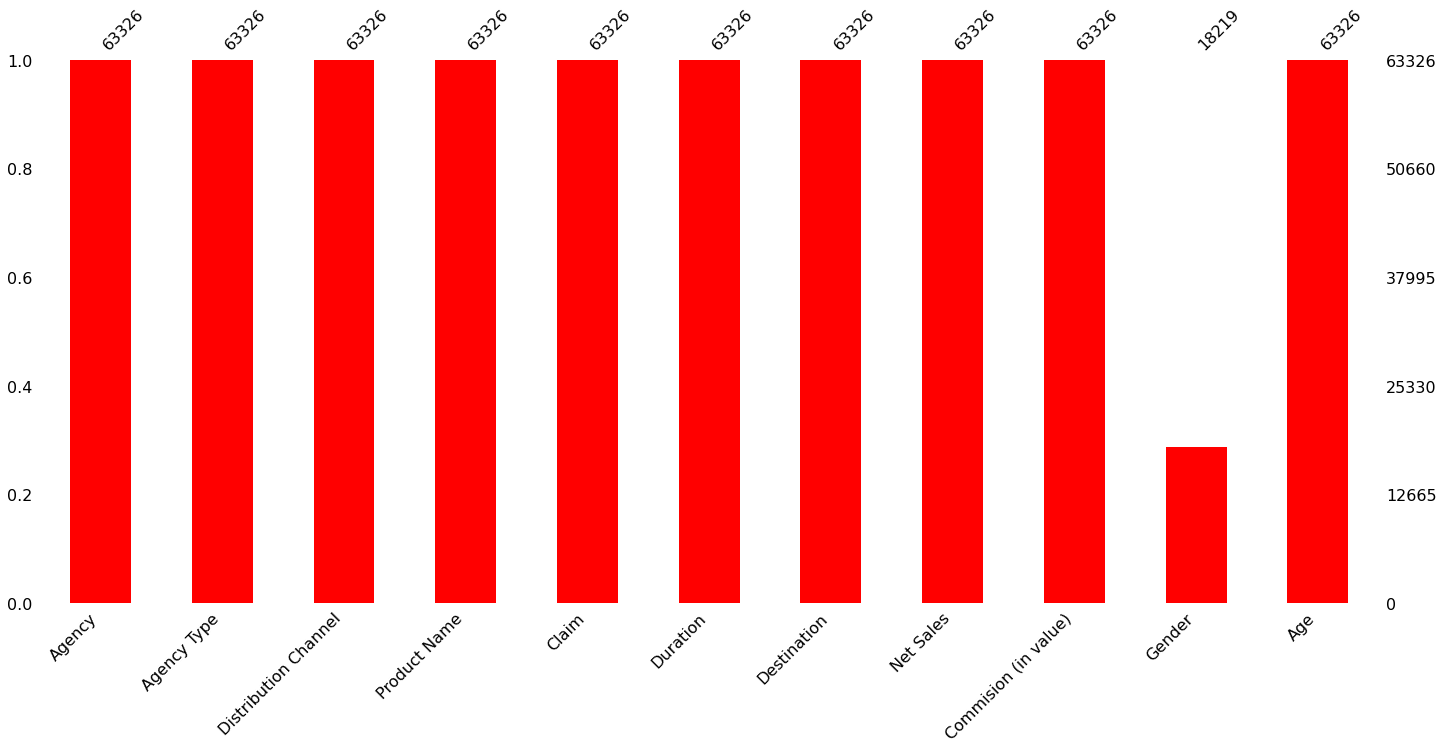

In [125]:
mns.bar(df,color = 'red')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [127]:
df.shape

(63326, 11)

In [128]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [129]:
cat_veriable = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim','Destination','Gender']
enc =LabelEncoder()
for col in cat_veriable:
    df[col] = enc.fit_transform(df[col])

In [130]:
df['Gender'] = df['Gender'].fillna(df['Gender'].dropna().mean())

In [131]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3,1,0,12,0,186,79,-29.0,9.57,0,81
1,3,1,0,12,0,186,79,-29.0,9.57,0,71
2,6,1,1,16,0,65,4,-49.5,29.70,2,32
3,6,1,1,16,0,60,4,-39.6,23.76,2,32
4,6,1,1,16,0,79,61,-19.8,11.88,2,41


In [132]:
X = df.drop('Agency',axis=1)
y = df['Agency']

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [134]:
model1 = KNeighborsClassifier()
model1.fit(X_train,y_train)

KNeighborsClassifier()

In [135]:
pred1 = model1.predict(X_test)
pred1

array([7, 7, 8, ..., 7, 9, 7])

In [136]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.82      0.43      0.56        21
           1       0.86      0.53      0.65        80
           2       0.97      0.99      0.98      2052
           3       0.28      0.30      0.29        23
           4       0.44      0.42      0.43        45
           5       0.38      0.23      0.29        22
           6       0.93      0.96      0.95      2154
           7       0.99      1.00      0.99      8853
           8       0.96      0.99      0.98       193
           9       0.93      0.90      0.92      1552
          10       0.81      0.72      0.76       104
          11       0.90      0.52      0.66       151
          12       0.98      0.98      0.98       176
          13       0.97      0.97      0.97       264
          14       0.93      0.95      0.94       122
          15       1.00      1.00      1.00        20

    accuracy                           0.97     15832
   macro avg       0.82   

AxesSubplot(0.125,0.125;0.62x0.755)


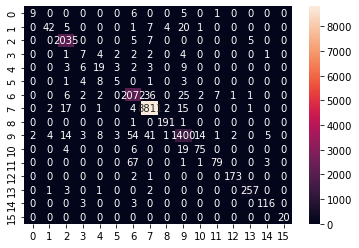

In [137]:
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True,fmt='0.5g'))